In [1]:
from nblogger import logger
import numpy as np
import matplotlib.pyplot as plt
import parameters

import theano_shim as shim
import sinn
#import sinn.histories as histories
from sinn.histories import Spiketrain, Series
import sinn.iotools as io
import sinn.analyze as anlz
#from sinn.analyze.heatmap import HeatMap
#import sinn.optimize.gradient_descent as gd

import core
import generate_input
import generate_spikes

np.set_printoptions(precision=5, suppress=True)
%matplotlib inline

2017-08-29 17:51:25,306 - sinn.analyze.stylelib.color_schemes - WARNING - [monochrome_palette]: value was greater than 1 and was clipped.


In [2]:
input_params = parameters.ParameterSet("input.params")

In [3]:
Ihist = Series.from_raw(io.loadraw(
        core.get_pathname(core.input_subdir, input_params)))

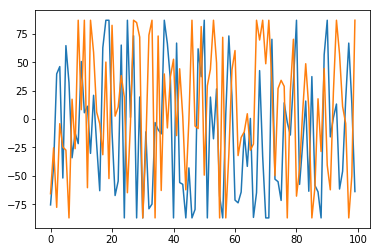

In [4]:
anlz.plot(Ihist[:100])

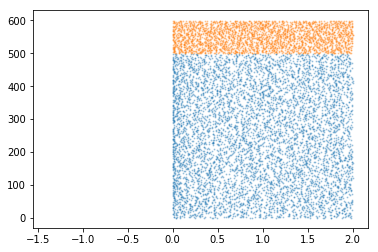

In [2]:
spikes_params = parameters.ParameterSet("spikes.params")

shist = Spiketrain.from_raw(io.loadraw(
    core.get_pathname(core.spikes_subdir, spikes_params)))

anlz.plot(shist, start=0, stop=-1)

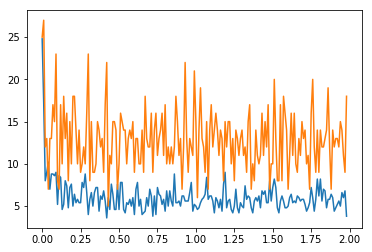

In [3]:
Ahist = core.compute_spike_activity(shist, 0.001)

anlz.plot(anlz.subsample(Ahist, 10))

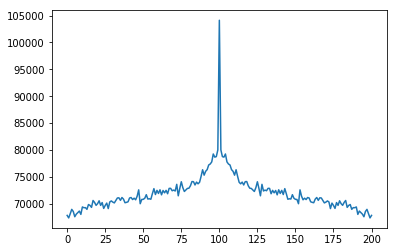

In [4]:
plt.plot(core.crosscorrelation(Ahist[:][:,0], Ahist[:][:,0], maxlag=100))

In [5]:
spikes_params.initializer = 'stationary'

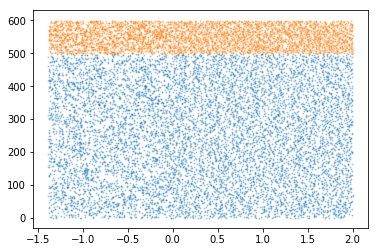

In [6]:
shist_stat = Spiketrain.from_raw(io.loadraw(
    core.get_pathname(core.spikes_subdir, spikes_params)))

anlz.plot(shist_stat, start=0, stop=-1)

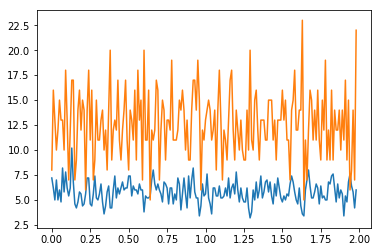

In [12]:
Ahist_stat = core.compute_spike_activity(shist_stat, 0.001)

anlz.plot(anlz.subsample(Ahist_stat, 10))

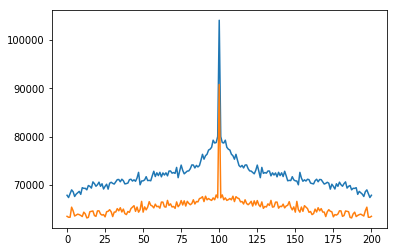

In [13]:
plt.plot(core.crosscorrelation(Ahist[:][:,0], Ahist[:][:,0], maxlag=100))
plt.plot(core.crosscorrelation(Ahist_stat[:][:,0], Ahist_stat[:][:,0], maxlag=100))